In [1]:
i = 10 
print(i)

10


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')

# Chọn 2 đặc trưng để vẽ minh họa
X = df[['sepal_length', 'sepal_width']].values
y = df['species'].values

# 2. Chia dữ liệu train/test thủ công
def train_test_split_manual(X, y, test_size=0.2):
    indices = list(range(len(X)))
    random.shuffle(indices)
    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split], indices[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)

# 3. Chuẩn hóa thủ công (z-score)
def standardize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return (X - means) / stds, means, stds

X_train, means, stds = standardize(X_train)
X_test = (X_test - means) / stds

# 4. Tính khoảng cách Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# 5. Dự đoán lớp cho 1 điểm (KNN)
def predict_one(X_train, y_train, x_test, k=5):
    distances = euclidean_distance(X_train, x_test)
    k_indices = distances.argsort()[:k]
    k_labels = y_train[k_indices]

    # Đếm thủ công lớp xuất hiện nhiều nhất
    counts = {}
    for label in k_labels:
        counts[label] = counts.get(label, 0) + 1
    predicted = max(counts, key=counts.get)
    return predicted

# 6. Dự đoán toàn bộ tập test
predictions = np.array([predict_one(X_train, y_train, x, k=5) for x in X_test])

# 7. Tính độ chính xác
accuracy = np.mean(predictions == y_test) * 100
print(f"Độ chính xác: {accuracy:.2f}%")

# 8. Vẽ minh họa
plt.figure(figsize=(8, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Vẽ tập train
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0],
                X_train[y_train == label, 1],
                color=colors[label], label=f'Train {label}', alpha=0.5)

# Vẽ tập test với nhãn dự đoán
for i, x in enumerate(X_test):
    plt.scatter(x[0], x[1], color=colors[predictions[i]], marker='x', edgecolor='k', s=80)

plt.title('KNN trên Iris (K=5) - Không dùng Counter, train_test_split, StandardScaler')
plt.xlabel('sepal_length (scaled)')
plt.ylabel('sepal_width (scaled)')
plt.legend()
plt.show()


Độ chính xác: 80.00%


KeyError: 'setosa'

<Figure size 800x600 with 0 Axes>

Độ chính xác: 76.67%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1748\2372670850.py:78: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[0], x[1], color=colors[predictions[i]], marker='x', edgecolor='black', s=80)


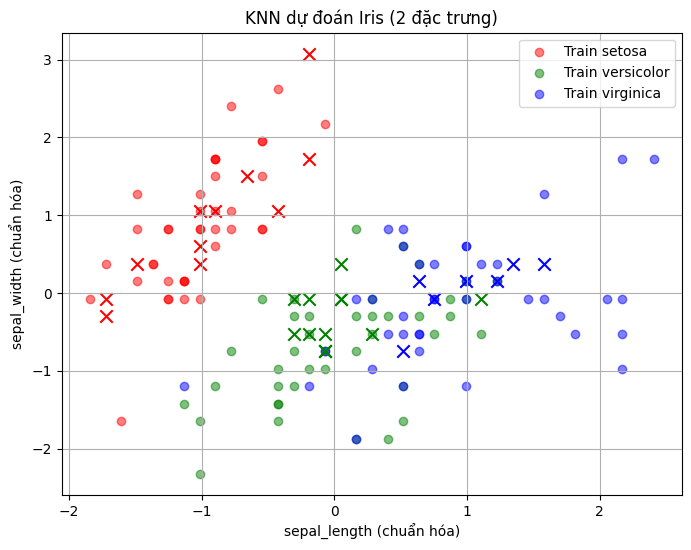

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')
X = df[['sepal_length', 'sepal_width']].values
y = df['species'].values

# 2. Tự chia train/test
def split_data(X, y, test_ratio=0.2):
    indices = list(range(len(X)))
    random.shuffle(indices)

    split_point = int(len(X) * (1 - test_ratio))
    train_idx = indices[:split_point]
    test_idx = indices[split_point:]

    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y, test_ratio=0.2)

# 3. Tự chuẩn hóa dữ liệu (Z-score)
def standardize(train, test):
    mean = train.mean(axis=0)
    std = train.std(axis=0)

    train_scaled = (train - mean) / std
    test_scaled = (test - mean) / std  # dùng mean và std của tập train

    return train_scaled, test_scaled

X_train, X_test = standardize(X_train, X_test)

# 4. Tính khoảng cách Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# 5. Hàm dự đoán KNN không dùng Counter
def predict(x, X_train, y_train, k=5):
    distances = euclidean_distance(X_train, x)
    k_indices = distances.argsort()[:k]
    k_labels = y_train[k_indices]

    # Đếm bằng từ điển
    label_count = {}
    for label in k_labels:
        label_count[label] = label_count.get(label, 0) + 1
    sorted_labels = sorted(label_count.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]

# 6. Dự đoán toàn bộ tập test
predictions = np.array([predict(x, X_train, y_train, k=5) for x in X_test])

# 7. Đánh giá độ chính xác
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Độ chính xác: {accuracy * 100:.2f}%")

# 8. Vẽ biểu đồ trực quan
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}


plt.figure(figsize=(8, 6))

# Vẽ tập huấn luyện
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_train[idx, 0], X_train[idx, 1], color=colors[label], label=f'Train {label}', alpha=0.5)

# Vẽ tập test với nhãn dự đoán
for i, x in enumerate(X_test):
    plt.scatter(x[0], x[1], color=colors[predictions[i]], marker='x', edgecolor='black', s=80)

plt.title('KNN dự đoán Iris (2 đặc trưng)')
plt.xlabel('sepal_length (chuẩn hóa)')
plt.ylabel('sepal_width (chuẩn hóa)')
plt.legend()
plt.grid(True)
plt.show()


Độ chính xác KNN: 73.33%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1748\1885381405.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_labels))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1748\1885381405.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[0], x[1], color=color_map[predictions[i]], marker='x', edgecolor='black', s=80)


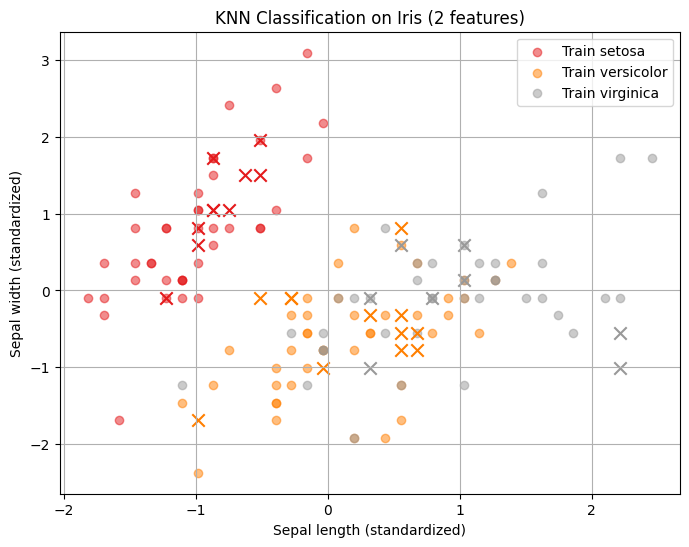

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')
X = df[['sepal_length', 'sepal_width']].values
y = df['species'].values

# 2. Tự chia train/test
def split_data(X, y, test_ratio=0.2):
    indices = list(range(len(X)))
    random.shuffle(indices)

    split_point = int(len(X) * (1 - test_ratio))
    train_idx = indices[:split_point]
    test_idx = indices[split_point:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = split_data(X, y, test_ratio=0.2)

# 3. Chuẩn hóa dữ liệu (Z-score)
def standardize(train, test):
    mean = train.mean(axis=0)
    std = train.std(axis=0)
    return (train - mean) / std, (test - mean) / std

X_train, X_test = standardize(X_train, X_test)

# 4. Hàm tính khoảng cách Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# 5. Hàm dự đoán KNN
def predict(x, X_train, y_train, k=5):
    distances = euclidean_distance(X_train, x)
    k_indices = distances.argsort()[:k]
    k_labels = y_train[k_indices]

    # Đếm nhãn thủ công
    label_count = {}
    for label in k_labels:
        label_count[label] = label_count.get(label, 0) + 1
    sorted_labels = sorted(label_count.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]

# 6. Dự đoán toàn bộ tập test
predictions = np.array([predict(x, X_train, y_train, k=5) for x in X_test])

# 7. Tính độ chính xác
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Độ chính xác KNN: {accuracy * 100:.2f}%")

# 8. Vẽ trực quan
unique_labels = np.unique(y)
colors = plt.cm.get_cmap('Set1', len(unique_labels))
color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

plt.figure(figsize=(8, 6))

# Tập train
for label in unique_labels:
    idx = y_train == label
    plt.scatter(X_train[idx, 0], X_train[idx, 1], color=color_map[label], label=f'Train {label}', alpha=0.5)

# Tập test với nhãn dự đoán
for i, x in enumerate(X_test):
    plt.scatter(x[0], x[1], color=color_map[predictions[i]], marker='x', edgecolor='black', s=80)

plt.title('KNN Classification on Iris (2 features)')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.legend()
plt.grid(True)
plt.show()


Độ chính xác KNN dựa trên Petal: 96.67%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1748\1884735962.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_labels))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1748\1884735962.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[0], x[1], color=color_map[predictions[i]], marker='x', edgecolor='black', s=80)


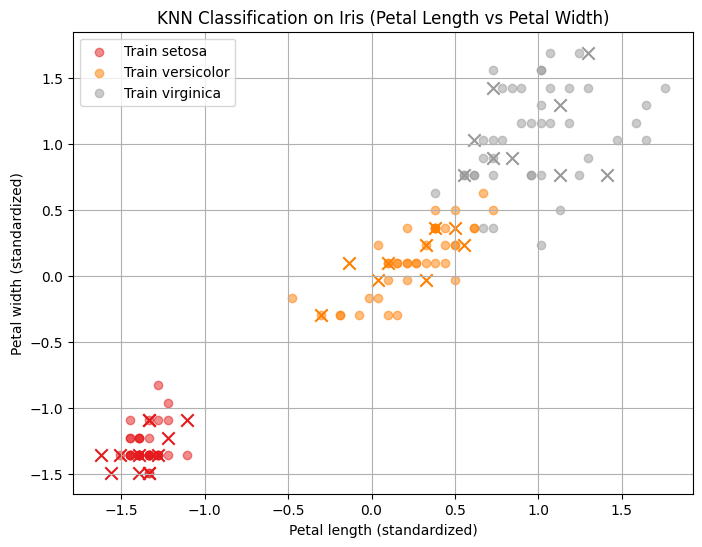

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')
X = df[['petal_length', 'petal_width']].values
y = df['species'].values

# 2. Tự chia train/test
def split_data(X, y, test_ratio=0.2):
    indices = list(range(len(X)))
    random.shuffle(indices)
    split_point = int(len(X) * (1 - test_ratio))
    return X[indices[:split_point]], X[indices[split_point:]], y[indices[:split_point]], y[indices[split_point:]]

X_train, X_test, y_train, y_test = split_data(X, y, test_ratio=0.2)

# 3. Chuẩn hóa dữ liệu (Z-score)
def standardize(train, test):
    mean = train.mean(axis=0)
    std = train.std(axis=0)
    return (train - mean) / std, (test - mean) / std

X_train, X_test = standardize(X_train, X_test)

# 4. Hàm tính khoảng cách Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# 5. Hàm dự đoán KNN
def predict(x, X_train, y_train, k=5):
    distances = euclidean_distance(X_train, x)
    k_indices = distances.argsort()[:k]
    k_labels = y_train[k_indices]

    # Đếm nhãn thủ công
    label_count = {}
    for label in k_labels:
        label_count[label] = label_count.get(label, 0) + 1
    sorted_labels = sorted(label_count.items(), key=lambda item: item[1], reverse=True)
    return sorted_labels[0][0]

# 6. Dự đoán toàn bộ tập test
predictions = np.array([predict(x, X_train, y_train, k=5) for x in X_test])

# 7. Độ chính xác
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Độ chính xác KNN dựa trên Petal: {accuracy * 100:.2f}%")

# 8. Vẽ trực quan
unique_labels = np.unique(y)
colors = plt.cm.get_cmap('Set1', len(unique_labels))
color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

plt.figure(figsize=(8, 6))

# Vẽ tập huấn luyện
for label in unique_labels:
    idx = y_train == label
    plt.scatter(X_train[idx, 0], X_train[idx, 1], color=color_map[label], label=f'Train {label}', alpha=0.5)

# Vẽ tập kiểm tra với nhãn dự đoán
for i, x in enumerate(X_test):
    plt.scatter(x[0], x[1], color=color_map[predictions[i]], marker='x', edgecolor='black', s=80)

plt.title('KNN Classification on Iris (Petal Length vs Petal Width)')
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend()
plt.grid(True)
plt.show()
